<a href="https://colab.research.google.com/github/ankitanigam26/test.ankitanigam/blob/main/weather_forecast_practice1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
df = pd.read_csv('/content/weather.csv')

In [ ]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [ ]:
df.shape

(366, 22)

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64


In [ ]:
df.fillna(df.mode().iloc[0], inplace=True)

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64


In [ ]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [ ]:
df.MaxTemp.value_counts()

MaxTemp
14.8    5
20.9    5
12.2    5
15.5    5
11.6    5
       ..
17.1    1
30.3    1
35.8    1
21.2    1
30.7    1
Name: count, Length: 187, dtype: int64

In [ ]:
df.Rainfall.value_counts()

Rainfall
0.0     263
0.2      17
0.6       6
0.8       5
0.4       5
1.0       4
6.6       3
1.8       3
5.2       3
4.8       3
2.0       3
4.0       3
3.4       3
1.2       3
3.6       2
3.8       2
1.4       2
3.0       2
6.4       2
11.0      2
17.4      2
1.6       2
16.2      2
2.6       1
8.2       1
7.2       1
7.6       1
19.2      1
6.2       1
9.8       1
7.4       1
16.8      1
19.8      1
18.8      1
10.4      1
4.4       1
9.0       1
2.2       1
12.2      1
14.4      1
5.4       1
4.2       1
22.6      1
25.8      1
2.8       1
39.8      1
13.2      1
Name: count, dtype: int64

In [ ]:
df.Rainfall.unique()

array([ 0. ,  3.6, 39.8,  2.8,  0.2, 16.2,  1.2,  0.6,  0.4, 25.8, 22.6,
        4.2,  6.6,  4. ,  5.4,  1.4,  3.4,  6.4, 11. , 17.4, 14.4,  2. ,
        4.8, 18.8, 12.2,  0.8,  5.2,  2.2,  1.8,  9. ,  1. ,  4.4, 10.4,
        3. , 19.8,  2.6,  7.2,  3.8,  6.2, 16.8,  1.6, 19.2,  7.4,  9.8,
        7.6,  8.2, 13.2])

In [ ]:
plotCorrelationMatrix(df, 8)

In [ ]:
columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow']


In [ ]:
selected_data = df[columns]

In [ ]:
correlation_matrix = selected_data.corr()

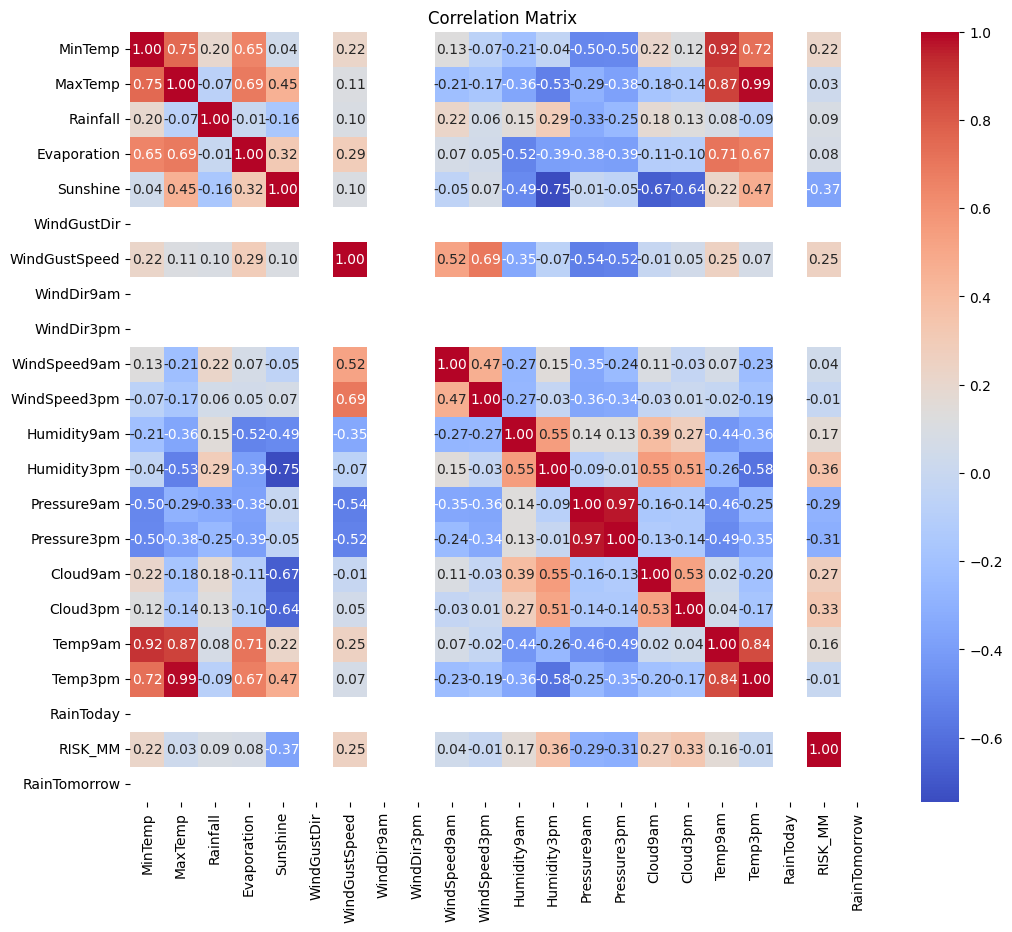

In [ ]:
selected_data_numeric = selected_data.apply(pd.to_numeric, errors='coerce')
correlation_matrix = selected_data_numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

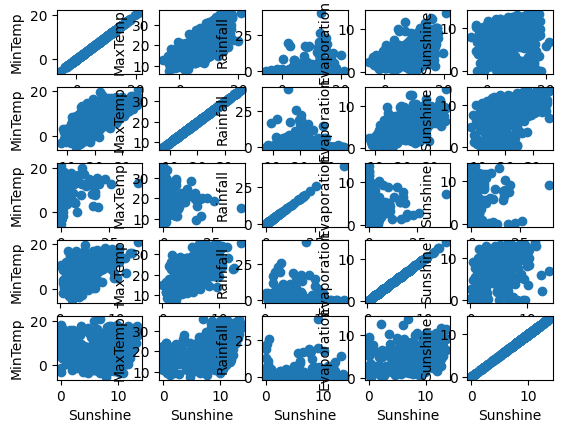

In [ ]:
def plotScatterMatrix(df, n_rows, n_cols):
    for i in range(n_rows):
        for j in range(n_cols):
            plt.subplot(n_rows, n_cols, i * n_cols + j + 1)
            plt.scatter(df.iloc[:, i], df.iloc[:, j])
            plt.xlabel(df.columns[i])
            plt.ylabel(df.columns[j])

plotScatterMatrix(df, 5, 5)

In [ ]:
yes_no_columns = ['RainToday', 'RainTomorrow']

In [ ]:
for col in yes_no_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [ ]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6,1
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6,1
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8,1
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8,1
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0,0


In [ ]:
columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow']

selected_data = df[columns]

In [ ]:
correlation_matrix = selected_data.corr()

In [ ]:
columns_to_drop = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

In [ ]:
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6,1
1,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6,1
2,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8,1
3,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8,1
4,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0,0


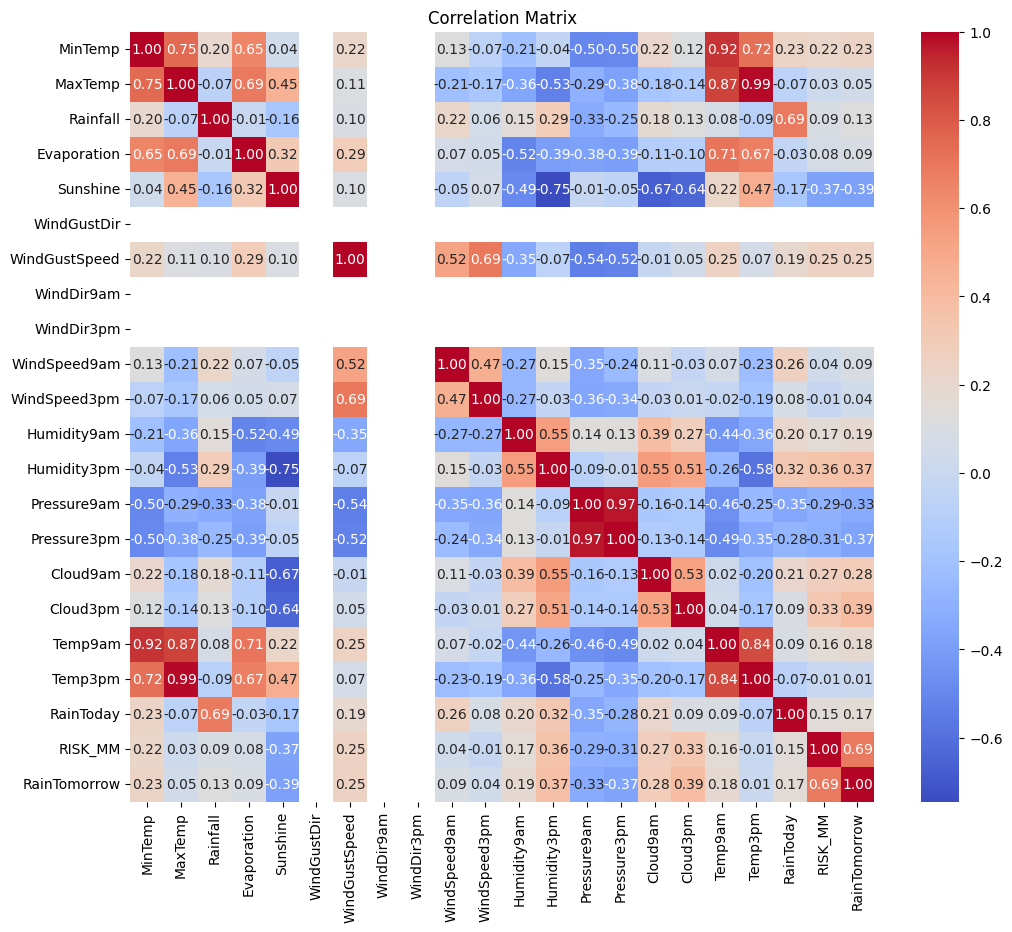

In [ ]:
selected_data_numeric = selected_data.apply(pd.to_numeric, errors='coerce')
correlation_matrix = selected_data_numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
target = 'RainTomorrow'

In [ ]:
selected_features = ['Evaporation', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'RISK_MM']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[selected_features], df[target], test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [ ]:
X = selected_features = ['Evaporation', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'RISK_MM']

In [ ]:
feature_importances = rf_classifier.feature_importances_
features = selected_features
indices = np.argsort(feature_importances)[::-1]

In [ ]:
if isinstance(X, list):
    # Convert X to a NumPy array
    X = np.array(X)

# Print the shape of X
print(X.shape)

(7,)


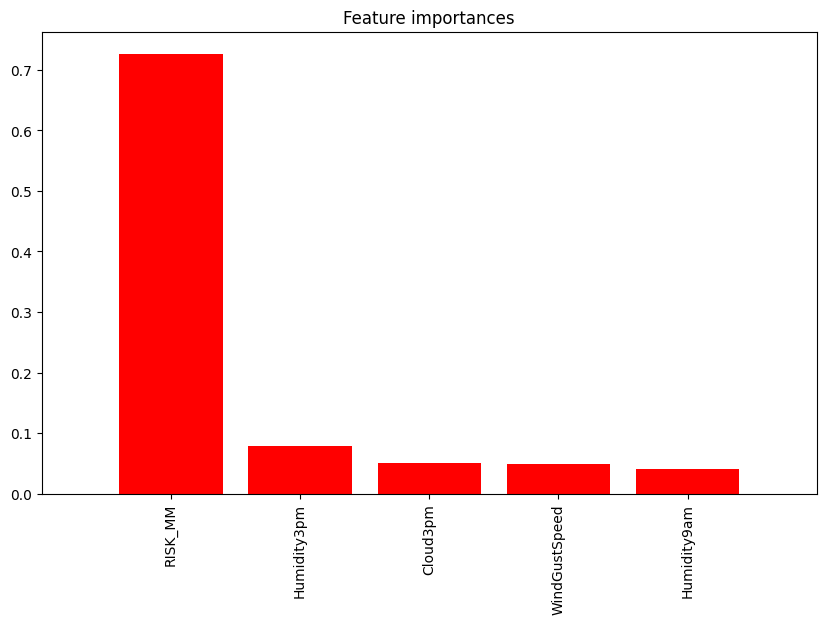

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(5), feature_importances[indices[:5]], color="r", align="center")
plt.xticks(range(5), [features[i] for i in indices[:5]], rotation=90)
plt.xlim([-1, 5])
plt.show()

In [ ]:
df['Date'] = pd.date_range(start='1/1/2024', periods=len(df), freq='D')
df.set_index('Date', inplace=True)

In [ ]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,
2024-01-01,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6,1
2024-01-02,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6,1
2024-01-03,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8,1
2024-01-04,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8,1
2024-01-05,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0,0
